In [7]:
# Import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [8]:
# Read CSV files
kansas_file = "Resources/Kansas_City_Final.csv"
denver_file = "Resources/Denver_Final.csv"
chicago_file = "Resources/Chicago_Final.csv"
kansas_df = pd.read_csv(kansas_file, encoding= "unicode_escape")
denver_df = pd.read_csv(denver_file, encoding= "unicode_escape")
chicago_df = pd.read_csv(chicago_file, encoding= "unicode_escape")

In [9]:
# Evaluate data, drop na
kansas_df.head()
kansas_df = kansas_df.dropna()
kansas_df.head()

,Reported Date,Year,Month,City,Offense,Is Violent
1,6/30/2020,2020,20-Jun,Kansas City,Drug / Narcotic Violations,Non-Violent
2,6/30/2020,2020,20-Jun,Kansas City,Shoplifting,Non-Violent
4,6/30/2020,2020,20-Jun,Kansas City,Burglary/Breaking and Entering,Non-Violent
5,6/30/2020,2020,20-Jun,Kansas City,Kidnapping / Abduction,Violent
8,6/30/2020,2020,20-Jun,Kansas City,Stolen Property Offenses,Non-Violent


In [10]:
# Group data by offense type and organize 


koffense_df = kansas_df.groupby("Offense").count()
koffense_df = koffense_df.sort_values("Reported Date", ascending=False)
koffense_df.head(10)


,Reported Date,Year,Month,City,Is Violent
Offense,,,,,
Simple Assault,15588,15588,15588,15588,15588
Aggravated Assault,11681,11681,11681,11681,11681
Vandalism/Destruction of Property,8887,8887,8887,8887,8887
Motor Vehicle Theft,7133,7133,7133,7133,7133
Theft From Motor Vehicle,6190,6190,6190,6190,6190
Burglary/Breaking and Entering,6036,6036,6036,6036,6036
Shoplifting,5641,5641,5641,5641,5641
All Other Offenses,5250,5250,5250,5250,5250
All Other Larceny,4547,4547,4547,4547,4547


In [11]:
# Pie chart data

# Grab data for top 5 crimes
SimAssault_df = kansas_df.loc[kansas_df["Offense"] == "Simple Assault"]
AggAssault_df = kansas_df.loc[kansas_df["Offense"] == "Aggravated Assault"]
Vandalism_df = kansas_df.loc[kansas_df["Offense"] == "Vandalism/Destruction of Property"]
MVTheft_df = kansas_df.loc[kansas_df["Offense"] == "Motor Vehicle Theft"]
TheftfromMV_df = kansas_df.loc[kansas_df["Offense"] == "Theft From Motor Vehicle"]

# Create data for charts
SimAssault = SimAssault_df["Offense"].count()
AggAssault = AggAssault_df["Offense"].count()
Vandalism = Vandalism_df["Offense"].count()
MVTheft = MVTheft_df["Offense"].count()
TheftfromMV = TheftfromMV_df["Offense"].count()
Total = koffense_df["Reported Date"].sum()
Other = Total - (SimAssault - AggAssault - Vandalism - MVTheft - TheftfromMV)

print(SimAssault, AggAssault, Vandalism, MVTheft, TheftfromMV, Other, Total)


15588 11681 8887 7133 6190 122725 104422


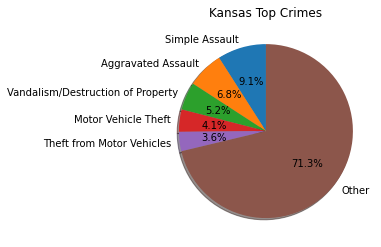

In [12]:
# Plot pie chart
plot_labels = ["Simple Assault", "Aggravated Assault", "Vandalism/Destruction of Property", 
              "Motor Vehicle Theft", "Theft from Motor Vehicles", "Other"]
plot_values = [SimAssault, AggAssault, Vandalism, MVTheft, TheftfromMV, Other]
plt.title("Kansas Top Crimes")
plt.pie(plot_values, labels=plot_labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

In [18]:
# Violent / Non-violent crime trends

ktrend_df = kansas_df.groupby(["Is Violent", "Month"]).count()
# kviolent_df = ktrend_df.loc[ktrend_df["Is Violent"] == "Violent"]
ktrend_df.head()

Reported Date  Year  City  Offense
Is Violent  Month                                     
Non-Violent 19-Apr           5193  5193  5193     5193
            19-Aug           5228  5228  5228     5228
            19-Dec           4116  4116  4116     4116
            19-Jul           5287  5287  5287     5287
            19-Jun           4625  4625  4625     4625

In [58]:
nonviolent_df = ktrend_df.loc["Non-Violent"]

violent_df = ktrend_df.loc["Violent"]
nonviolent_df = ktrend_df.loc["Non-Violent"]
y_axis = nonviolent_df["Offense"]
x_axis = violent_df.index



x_axis


Index(['19-Apr', '19-Aug', '19-Dec', '19-Jul', '19-Jun', '19-Mar', '19-May',
       '19-Nov', '19-Oct', '19-Sep', '20-Apr', '20-Feb', '20-Jan', '20-Jun',
       '20-Mar', '20-May'],
      dtype='object', name='Month')

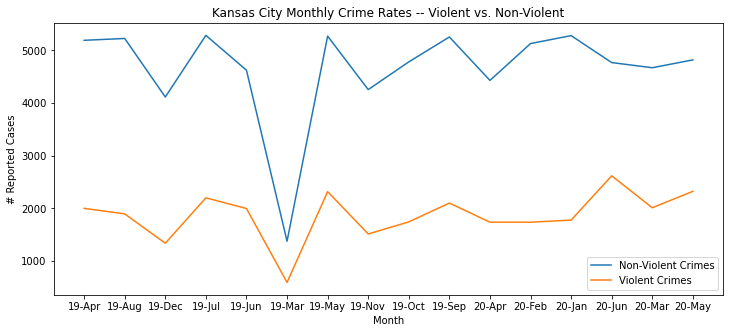

In [77]:
# Step 2:  Generate line plot as figure 2
plt.figure(figsize=(12, 5))

plt.plot(nonviolent_df.index, nonviolent_df["Offense"], label="Non-Violent Crimes")
plt.plot(violent_df.index, violent_df["Offense"], label="Violent Crimes")
plt.legend(loc="lower right")
plt.title("Kansas City Monthly Crime Rates -- Violent vs. Non-Violent")
plt.xlabel("Month")
plt.ylabel("# Reported Cases")

plt.show()
